# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of claim that have been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard Tableau would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answer AND the Tableau Dashboard Link to regitaz@gmail.com. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
claim = pd.read_csv("tsa_claims.csv")

/Users/steven/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
claim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [5]:
claim.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


In [6]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [7]:
claim.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2004050450432,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [ ]:
sample_table = pd.DataFrame({"dataFeatures" : claim.columns,
                            "dataType" : ["object","object","object","object","object","object","object","object","object","object","object","object","object"],
                            "null" : claim.isnull().sum(),
                            "nullpct" : claim.isnull().sum() / },
                            index = [0,1,2,3,4,5,6,7,8,9,10,11,12])
                           
sample_table

If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
claim = claim.replace("-", np.nan)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [ ]:
claim["Date Received"] = pd.to_datetime(claim["Date Received"])


In [ ]:
claim["Incident Date"] = pd.to_datetime(claim["Incident Date"])

In [ ]:
claim

For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [ ]:
claim["Incident Date"].dt.year = claim["Date Received"].dt.year

In [10]:
claim["Incident Date"] = pd.to_datetime(claim["Incident Date"])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 300-09-03 00:00:00

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [20]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  202084 non-null  object        
 3   Airport Code   195302 non-null  object        
 4   Airport Name   195302 non-null  object        
 5   Airline Name   165646 non-null  object        
 6   Claim Type     196072 non-null  object        
 7   Claim Site     203251 non-null  object        
 8   Item           195878 non-null  object        
 9   Claim Amount   187472 non-null  object        
 10  Status         191510 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 20.3+ MB


In [24]:
claim_dates = claim[(claim["Date Received"] >= "2005-01-01") & (claim["Date Received"] <= "2009-12-31")]
claim_dates

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
53306,2006010699026,2005-01-02,12/6/2005 0:00,ABQ,Albuquerque International Sunport Airport,America West,Property Damage,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$395.00,Approved,$395.00,Approve in Full
53307,2005012874654,2005-01-02,12/20/2004 0:00,PDX,Portland International,Northwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$325.00,Denied,$0.00,Deny
53308,2006010698959,2005-01-02,12/24/2005 0:00,LAS,McCarran International,Mexicana,Passenger Property Loss,Checked Baggage,Other,$273.87,Denied,$0.00,Deny
53309,2006010698980,2005-01-02,12/26/2005 0:00,IAH,Houston - George Bush Intercontinental Airport,Continental Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,$790.00,Denied,$0.00,Deny
53310,2006010698987,2005-01-02,12/23/2005 0:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$155.06,Denied,$0.00,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145139,2010010667196,2009-12-31,12/17/2009 7:55,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,$695.00,Denied,$0.00,Deny
145140,2010010667198,2009-12-31,12/15/2009 0:00,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$25.50,Denied,$0.00,Deny
145141,2010010667199,2009-12-31,12/16/2009 10:00,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,$20.00,Denied,$0.00,Deny
145142,2010010767269,2009-12-31,12/11/2009 0:00,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$156.88,Insufficient; one of the following items requi...,NaN,NaN


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [28]:
claim["Day Differences"] = (claim.Date Received - claim.Incident Date)

SyntaxError: invalid syntax (<ipython-input-28-041c14d7e343>, line 1)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

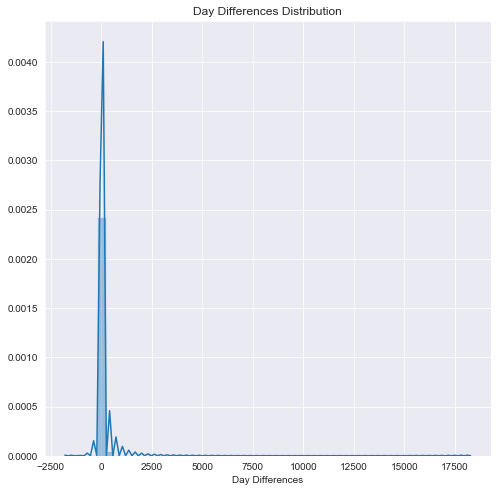

In [17]:
import seaborn as sns
claim.dropna()
sns.distplot(claim["Day Differences"])
plt.title("Day Differences Distribution")

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

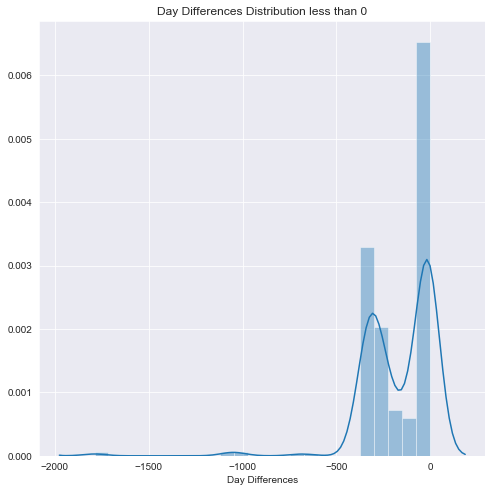

In [18]:
sns.distplot(claim["Day Differences"] < 0)
plt.title("Day Differences Distribution less than 0")

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

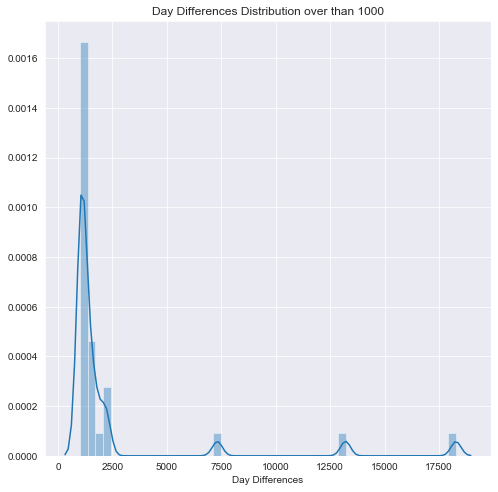

In [19]:
sns.distplot(claim["Day Differences"] > 1000)
plt.title("Day Differences Distribution over than 1000")

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [ ]:
there might be a data error in the formating sistem of the date time

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [34]:
claim["Claim Amount"] = claim["Claim Amount"].astype(str)
claim["Close Amount"] = claim["Close Amount"].astype(str)
claim["Claim Amount"] = claim["Claim Amount"].replace(";",".")
claim["Claim Amount"] = claim["Claim Amount"].replace("$","")
claim["Close Amount"] = claim["Close Amount"].replace(";",".")
claim["Close Amount"] = claim["Close Amount"].replace("$","")
claim["Claim Amount"] = claim["Claim Amount"].astype(float)
claim["Close Amount"] = claim["Close Amount"].astype(float)

ValueError: could not convert string to float: '2.270.09 '

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [21]:
claim["Amount Differences"] = claim["Claim Amount"] - claim["Close Amount"]

In [22]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

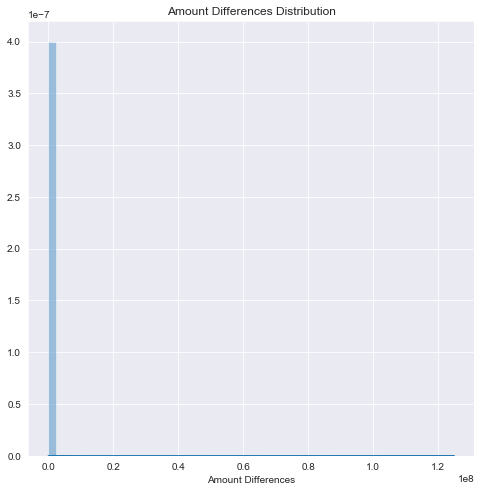

In [24]:
claim.dropna()

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21 00:00:00,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19 00:00:00,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
87,18808,2002-11-20,2002-09-24 00:00:00,CLT,Charlotte/Douglas International Airport,USAir,NaN,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,3800.00,Settled,1416.41,Settle,57.0,2383.59
108,21015,2002-11-29,2002-11-13 00:00:00,LAS,McCarran International,Continental Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),6111.59,Denied,0.00,Deny,16.0,6111.59
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.00,NaN,38.0,11500.00


In [38]:
by_claim = claim.groupby("Claim Amount")
by_claim.describe().transpose()

Claim Amount                 0.00             0.48             0.80   \
Claim Number count           28445                1                1   
             first             NaN              NaN              NaN   
             freq                1                1                1   
             last              NaN              NaN              NaN   
             top     2010040970648         1119205M         1217344M   
...                            ...              ...              ...   
Disposition  first             NaN              NaN              NaN   
             freq               40                1                1   
             last              NaN              NaN              NaN   
             top              Deny  Approve in Full  Approve in Full   
             unique              3                1                1   

Claim Amount                 1.00       1.000.00   1.000.000.00   \
Claim Number count              13            866             24   
             first             NaN            NaN            NaN   
             freq                1              1              1   
             last              NaN            NaN            NaN   
             top     2008010437308  2006040704182  2008090549525   
...                            ...            ...            ...   
Disposition  first             NaN            NaN            NaN   
             freq                6            610             13   
             last              NaN            NaN            NaN   
             top              Deny           Deny           Deny   
             unique              1              3              1   

Claim Amount        1.000.000.000.00       1.000.12       1.000.59  1.001.00   \
Claim Number count                  2              1              1         3   
             first                NaN            NaN            NaN       NaN   
             freq                   1              1              1         1   
             last                 NaN            NaN            NaN       NaN   
             top        2008063046385  2006040704206  2007042624528  0808015M   
...                               ...            ...            ...       ...   
Disposition  first                NaN            NaN            NaN       NaN   
             freq                   1              1              1         2   
             last                 NaN            NaN            NaN       NaN   
             top                 Deny           Deny           Deny    Settle   
             unique                 1              1              1         2   

Claim Amount         ...        998.98         999.00         999.35   \
Claim Number count   ...              1             24              1   
             first   ...            NaN            NaN            NaN   
             freq    ...              1              1              1   
             last    ...            NaN            NaN            NaN   
             top     ...  2004092363611  2006071709626  2005011273579   
...                  ...            ...            ...            ...   
Disposition  first   ...            NaN            NaN            NaN   
             freq    ...              1             17              1   
             last    ...            NaN            NaN            NaN   
             top     ...         Settle           Deny           Deny   
             unique  ...              1              3              1   

Claim Amount               999.49         999.78           999.93   \
Claim Number count               1              1                1   
             first             NaN            NaN              NaN   
             freq                1              1                1   
             last              NaN            NaN              NaN   
             top     2005083091900  2012050293485    2009051458597   
...                            ...            ..

In [37]:
by_close = claim.groupby("Close Amount")
by_close.describe().transpose()

KeyError: 'Close Amount'

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [ ]:
Yes i agree, some people tend to see this way of claiming insurance as a means to make profit from it, not to actually claim back what they have lost


## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [ ]:
# Question 1
there is no strong evidences to support that there are relationship between the Airport and/or the Airlne with the number of the claim that happend and the claim type
, NaN values are most likely to happen due to some circumstances that might be hard to be disclosed by the passenger.

# Question 2
I found out that mostly if the passengers claim site is at the checkpoint, the status and disposition are likely to be approved.
While if its at other places such as Checked Baggage, its mostly end up being settle in the status and disposition.

# Bonus Question
